## Batch Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
#Set the learning rate
#Initialize the Q to a random number
#Iterate it for the number of iterations.

In [3]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
print(theta)

[[ 2.98999345]
 [-1.22750229]]


In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
#print(X_b)

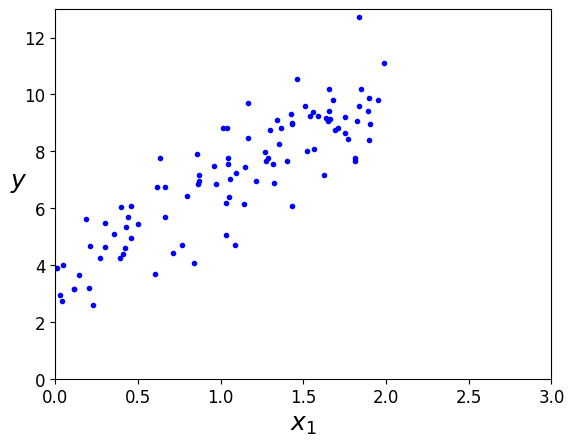

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 13]) #Set the x and y limits
plt.savefig("generated_data_plot for normal equation")
plt.show()


In [6]:
for iterations in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y) #Gradient Vector contains all the partial derivatives of cost function
   #print("Gradient:",gradient)
    theta = theta - eta* gradient #theta is model parameter.. theta = theta - learning rate* gradient
   #print("theta:",theta)


In [7]:
theta

array([[3.58759312],
       [3.30122286]])

In [8]:
X_new = np.array([[0], [2]]) # 4+3*X = 4, 10
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

In [9]:
X_new_b.dot(theta)

array([[ 3.58759312],
       [10.19003885]])

In [10]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

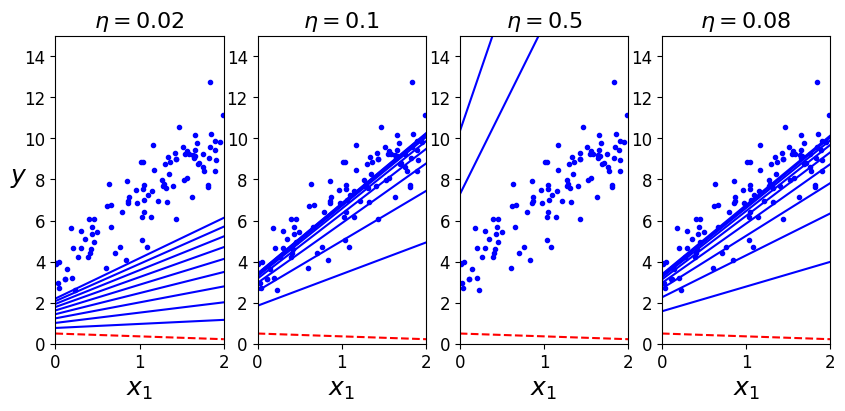

In [11]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(141); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(142); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(143); plot_gradient_descent(theta, eta=0.5)
plt.subplot(144); plot_gradient_descent(theta, eta=0.08)

plt.savefig("gradient_descent_plot")
plt.show()

## Stochastic Gradient Descent


In [12]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

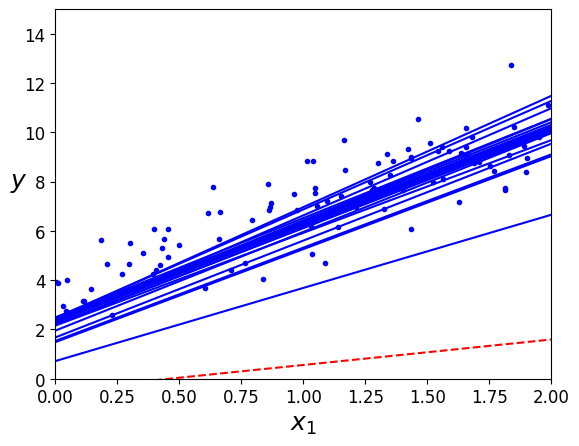

In [19]:
n_epochs = 10
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.savefig("sgd_plot")                                 # not shown
plt.show()                             

In [14]:
#Stochastic Gradient using Scikit Learn
from sklearn.linear_model import SGDRegressor

In [37]:
sgd_reg= SGDRegressor(max_iter=1000,tol= 1e-3,penalty=None,eta0=0.08)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.08, penalty=None)

In [38]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.53861475]), array([3.25537143]))

In [39]:
y_predict = sgd_reg.predict(X_new)
y_predict

array([ 3.53861475, 10.04935761])

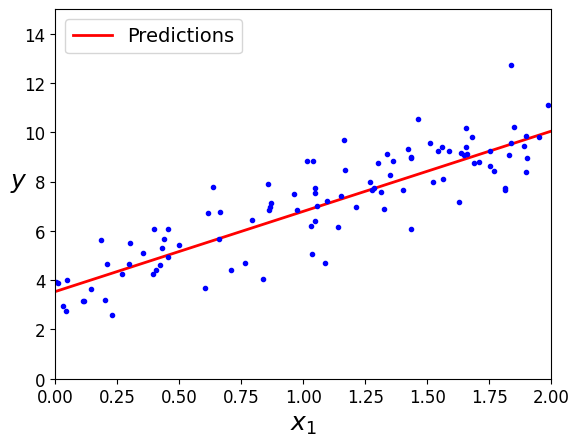

In [40]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.savefig("linear_model_predictions_plot")
plt.show()